# Peer-graded Assignment: Описательный анализ данных

Часто при работе с пользовательскими данными приходится сталкиваться с тем, что данные предоставляются для работы без описания. При этом не известно, что содержательно представляют собой те или иные признаки, а известны лишь их типы: числовые, категориальные, номинальные переменные. Такие ситуации - не редкость при работе с «чувствительными» данными, например, в сфере банковской аналитики, HR-аналитики, сфере телекоммуникаций, страхования, здравоохранения, недвижимости или ритейла. Тем не менее, с такими данным нужно уметь работать, и нужно уметь проводить на них классические этапы анализа, в частности описательный анализ данных и визуализацию. Именно этим мы займемся на первой неделе.


В этом задании мы потренируемся делать описательный анализ и визуализацию так называемых «закрытых» данных - данных, которые предоставляются для анализа и построения моделей без описания. Выборка, с которой мы будем работать прилагается.

* Метки классов (здесь `1` соответствует классу `отток`, `-1` - классу `не отток`) – `orange_small_churn_labels.train`
* Данные (предоставлены без описания, однако известно, что первые 190 переменных являются числовыми, а оставшиеся 40 - категориальными) – `orange_small_churn_data.train`

Скачайте эти файлы [на странице задания](https://www.coursera.org/learn/data-analysis-project/peer/roSOe/opisatiel-nyi-analiz-dannykh) и переходите к выполнению задачи! Результатом выполнения задания является jupyter notebook. Перед отправкой результата убедитесь, что вы выполнили все пункты из задания и это можно понять из вашего notebook'а. Проверьте, что код написан понятно и аккуратно - это поможет вашим сокурсником лучше понять, что вы сделали, и оценить вашу работу.

## Инструкции

1\. Загрузите данные `orange_small_churn_data.train` и `orange_small_churn_labels.train`

In [1]:
import pandas as pd

In [2]:
churn_data = pd.read_csv('orange_small_churn_data.train', sep=',')
churn_labels = pd.read_csv('orange_small_churn_labels.train')

In [3]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 230 entries, Var1 to Var230
dtypes: float64(191), int64(1), object(38)
memory usage: 70.2+ MB


Процент пропусков для каждого признака.

In [4]:
for col in churn_data.columns:
    print(col, round(churn_data[col].isnull().sum()/churn_data.shape[0] * 100, 3), '%')

Var1 98.575 %
Var2 97.485 %
Var3 97.488 %
Var4 96.812 %
Var5 97.088 %
Var6 11.088 %
Var7 11.1 %
Var8 100.0 %
Var9 98.575 %
Var10 97.088 %
Var11 97.488 %
Var12 98.84 %
Var13 11.1 %
Var14 97.488 %
Var15 100.0 %
Var16 97.088 %
Var17 96.812 %
Var18 96.812 %
Var19 96.812 %
Var20 100.0 %
Var21 11.088 %
Var22 10.04 %
Var23 97.088 %
Var24 14.54 %
Var25 10.04 %
Var26 97.088 %
Var27 97.088 %
Var28 10.042 %
Var29 98.575 %
Var30 98.575 %
Var31 100.0 %
Var32 100.0 %
Var33 98.35 %
Var34 97.485 %
Var35 10.04 %
Var36 97.485 %
Var37 96.812 %
Var38 10.04 %
Var39 100.0 %
Var40 97.485 %
Var41 98.575 %
Var42 100.0 %
Var43 97.485 %
Var44 10.04 %
Var45 99.29 %
Var46 97.485 %
Var47 98.575 %
Var48 100.0 %
Var49 97.485 %
Var50 98.575 %
Var51 92.525 %
Var52 100.0 %
Var53 98.575 %
Var54 97.485 %
Var55 100.0 %
Var56 98.69 %
Var57 0.0 %
Var58 98.575 %
Var59 98.345 %
Var60 97.088 %
Var61 98.35 %
Var62 98.84 %
Var63 98.592 %
Var64 99.525 %
Var65 11.1 %
Var66 98.592 %
Var67 97.088 %
Var68 97.485 %
Var69 97.088 %
Var70

2\. Рассчитайте доли классов `отток` и `не отток`.

In [5]:
churn_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39999 entries, 0 to 39998
Data columns (total 1 columns):
-1    39999 non-null int64
dtypes: int64(1)
memory usage: 312.6 KB


In [6]:
churn_data.drop(index=39999,inplace=True)

Доля класса отток.

In [7]:
print(round(sum(churn_labels.values.reshape((churn_labels.shape[0])) == 1)/churn_labels.shape[0] * 100, 3), '%')

7.44 %


Доля класса не отток.

In [8]:
print(round(sum(churn_labels.values.reshape((churn_labels.shape[0])) == -1)/churn_labels.shape[0] * 100, 3), '%')

92.56 %


3\. Рассчитайте корреляции переменных с целевой функцией и проанализируйте полученные данные.

Обратите внимание на то, что целевая функция предсталвляет собой бинарную переменную. Теоретически, это не помешает рассчиать, например, корреляцию Пирсона между непрерывной переменной и целевой функцией, онднако анализиоовать полученные результаты будет сложно, корреляция Пирсона просто не рассчитана на такое применение. Кто уже забыл, как действовать в такой ситуации - вспоминить можно вот здесь: https://www.coursera.org/teach/stats-for-data-analysis/content/edit/lecture/prX3S/video-subtitles 

Мерой силы взаимосвязи между непрерывной и бинарной переменной может служить разность математических ожиданий непрерывной переменной при разных значениях бинарной переменной: $$X_1 \in R$$ $$X_2 \in \{1,-1\}$$ $$E (X_1 | X_2 = 1) − E (X_1 | X_2 = -1)$$

$E (X_1 | X_2 = 1)$

In [9]:
E1 = churn_data[churn_labels.values == 1][churn_data.columns[:190]].mean().values

$E (X_1 | X_2 = -1)$

In [10]:
E_1 = churn_data[churn_labels.values == -1][churn_data.columns[:190]].mean().values

$E (X_1 | X_2 = 1) − E (X_1 | X_2 = -1)$

In [11]:
rel = E1-E_1

Для целевой и категориальных переменных посчитаем коэффициент V-Крамера.

In [12]:
import numpy as np
from scipy.stats import chi2_contingency

def V_Cramers(X):
    chi_2 = chi2_contingency(X)[0]
    n = np.sum(X)
    k1,k2 = X.shape
    return np.sqrt(chi_2/(n*(np.min([k1,k2])-1)))

In [13]:
v_cramers_coef = {}

for col in churn_data.columns[190:]:
    df = pd.crosstab(churn_data[col].values, churn_labels.values.reshape((churn_labels.shape[0])))
    if df.values.shape != (0,0):
        v_cramers_coef[col] = V_Cramers(df.values)
    else:
        v_cramers_coef[col] = None

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


4\. Визуализируйте данные: рассмотрите топ 20 числовых переменных, наиболее сильно коррелирующих с целевой функцией. Для этих переменных постройте:
* Распределения в разрезе классов
* Отобразите объекты в координатах пар признаков

Топ 20 числовых переменных, наиболее сильно коррелирующих с целевой функцией.

In [14]:
import seaborn as sns
from matplotlib import  pyplot as plt
% matplotlib inline

In [15]:
a = np.abs(rel)
a[a.argsort()]

array([0.00000000e+00, 5.01388455e-04, 5.53275854e-04, 8.77579041e-04,
       3.77985514e-03, 4.75508681e-03, 5.37634409e-03, 8.60772812e-03,
       1.18479046e-02, 1.89035917e-02, 2.06185567e-02, 2.30202578e-02,
       2.64650284e-02, 3.53648504e-02, 3.74354923e-02, 4.37377833e-02,
       4.50726889e-02, 5.16129032e-02, 5.38499196e-02, 5.66473180e-02,
       6.00178531e-02, 6.04083435e-02, 6.65552308e-02, 6.81946802e-02,
       9.03225806e-02, 9.46795472e-02, 1.00022520e-01, 1.11765530e-01,
       1.29099937e-01, 1.72389678e-01, 1.81434599e-01, 1.83008136e-01,
       2.26658675e-01, 2.55786857e-01, 2.76129032e-01, 2.84236171e-01,
       2.87924888e-01, 3.20996038e-01, 3.63010753e-01, 4.30390492e-01,
       4.37351443e-01, 4.91182796e-01, 5.19526027e-01, 5.86919994e-01,
       6.13582922e-01, 6.18377980e-01, 6.23097447e-01, 7.23049726e-01,
       7.40448717e-01, 8.25217862e-01, 9.09631698e-01, 9.31934276e-01,
       9.44419093e-01, 1.03213611e+00, 1.13701085e+00, 1.23362155e+00,
      

In [16]:
corr_20 = {}
names_20 = []

for index, value in zip(a.argsort()[-20-16:-16], rel[a.argsort()][-20-16:-16]):
    corr_20['Var'+str(index+1)] = value
    names_20.append('Var'+str(index+1))

In [17]:
corr_20

{'Var10': 318625.45657038956,
 'Var108': 69079.71561621097,
 'Var111': 111221.73257760843,
 'Var114': -173334.42671194114,
 'Var131': -2506478.221402555,
 'Var133': -95935.75904359436,
 'Var153': -105235.93476470094,
 'Var162': -65465.86808149406,
 'Var177': -331279.2497170345,
 'Var180': -350566.35160680534,
 'Var182': -352749.920063711,
 'Var33': 103216.77555668016,
 'Var37': -269559.20683317864,
 'Var5': 183406.42381751636,
 'Var53': -168186.12172068795,
 'Var58': -100346.79957582185,
 'Var59': -82565.96098800079,
 'Var69': 1407639.6609902787,
 'Var70': 220953.93321211275,
 'Var86': -91936.05864724051}

Распределения двадцати числовых наиболее коррелированных переменных в разрезе классов

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


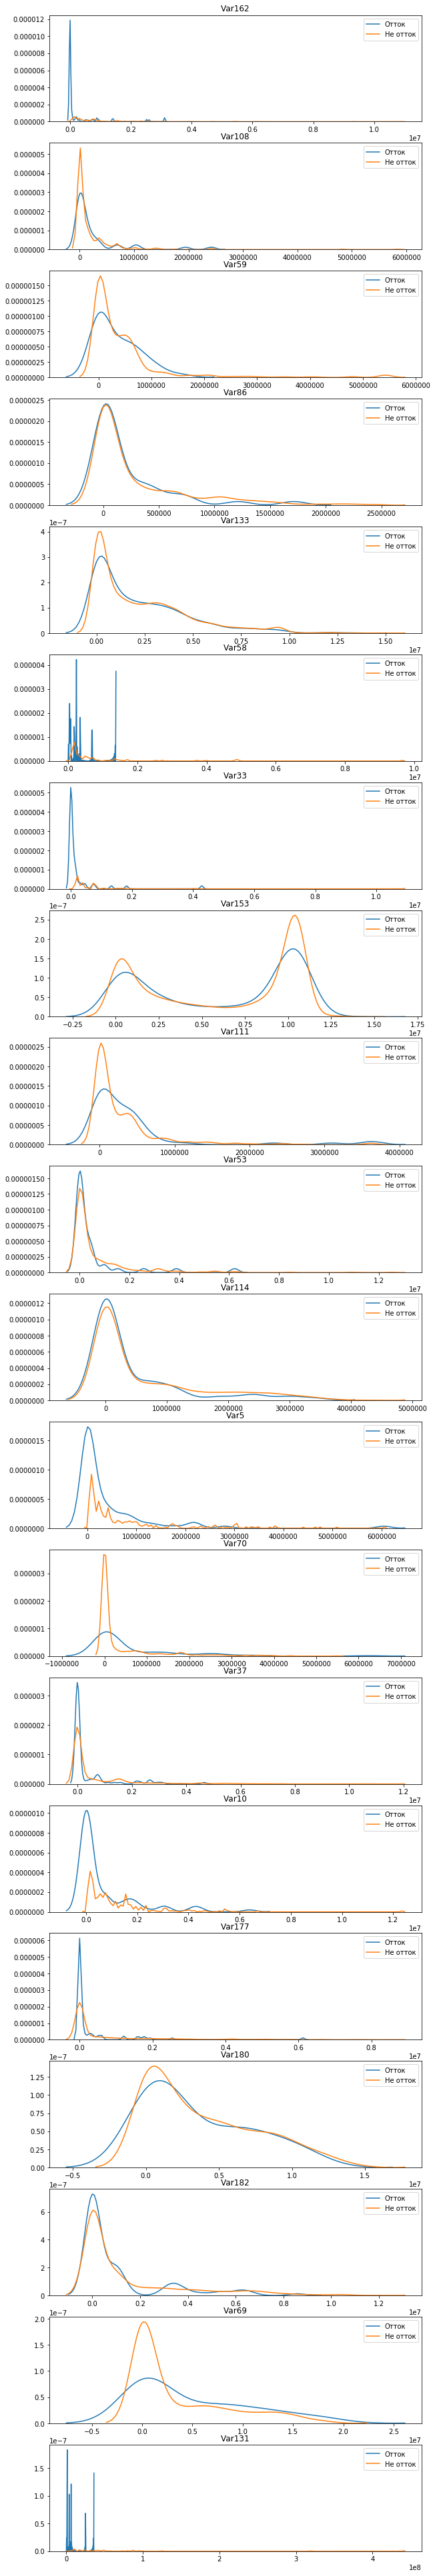

In [18]:
fig, ax = plt.subplots(nrows=20,ncols=1,figsize=(10,70))
for index, i in enumerate(corr_20.keys()):
    a = sns.kdeplot(churn_data[(churn_labels == 1).values][i], ax = ax[index], label = 'Отток')
    a = sns.kdeplot(churn_data[(churn_labels == -1).values][i], ax = ax[index], label = 'Не отток')
    a.title.set_text(i)
    

Объекты в координатах пар двадцати числовых наиболее коррелированных признаков.

In [19]:
labels = []
for i in churn_labels.values:
    if i == 1:
        labels.append('Отток')
    else:
        labels.append('Не отток')

In [20]:
churn_data_labels = churn_data
churn_data_labels['labels'] = labels

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


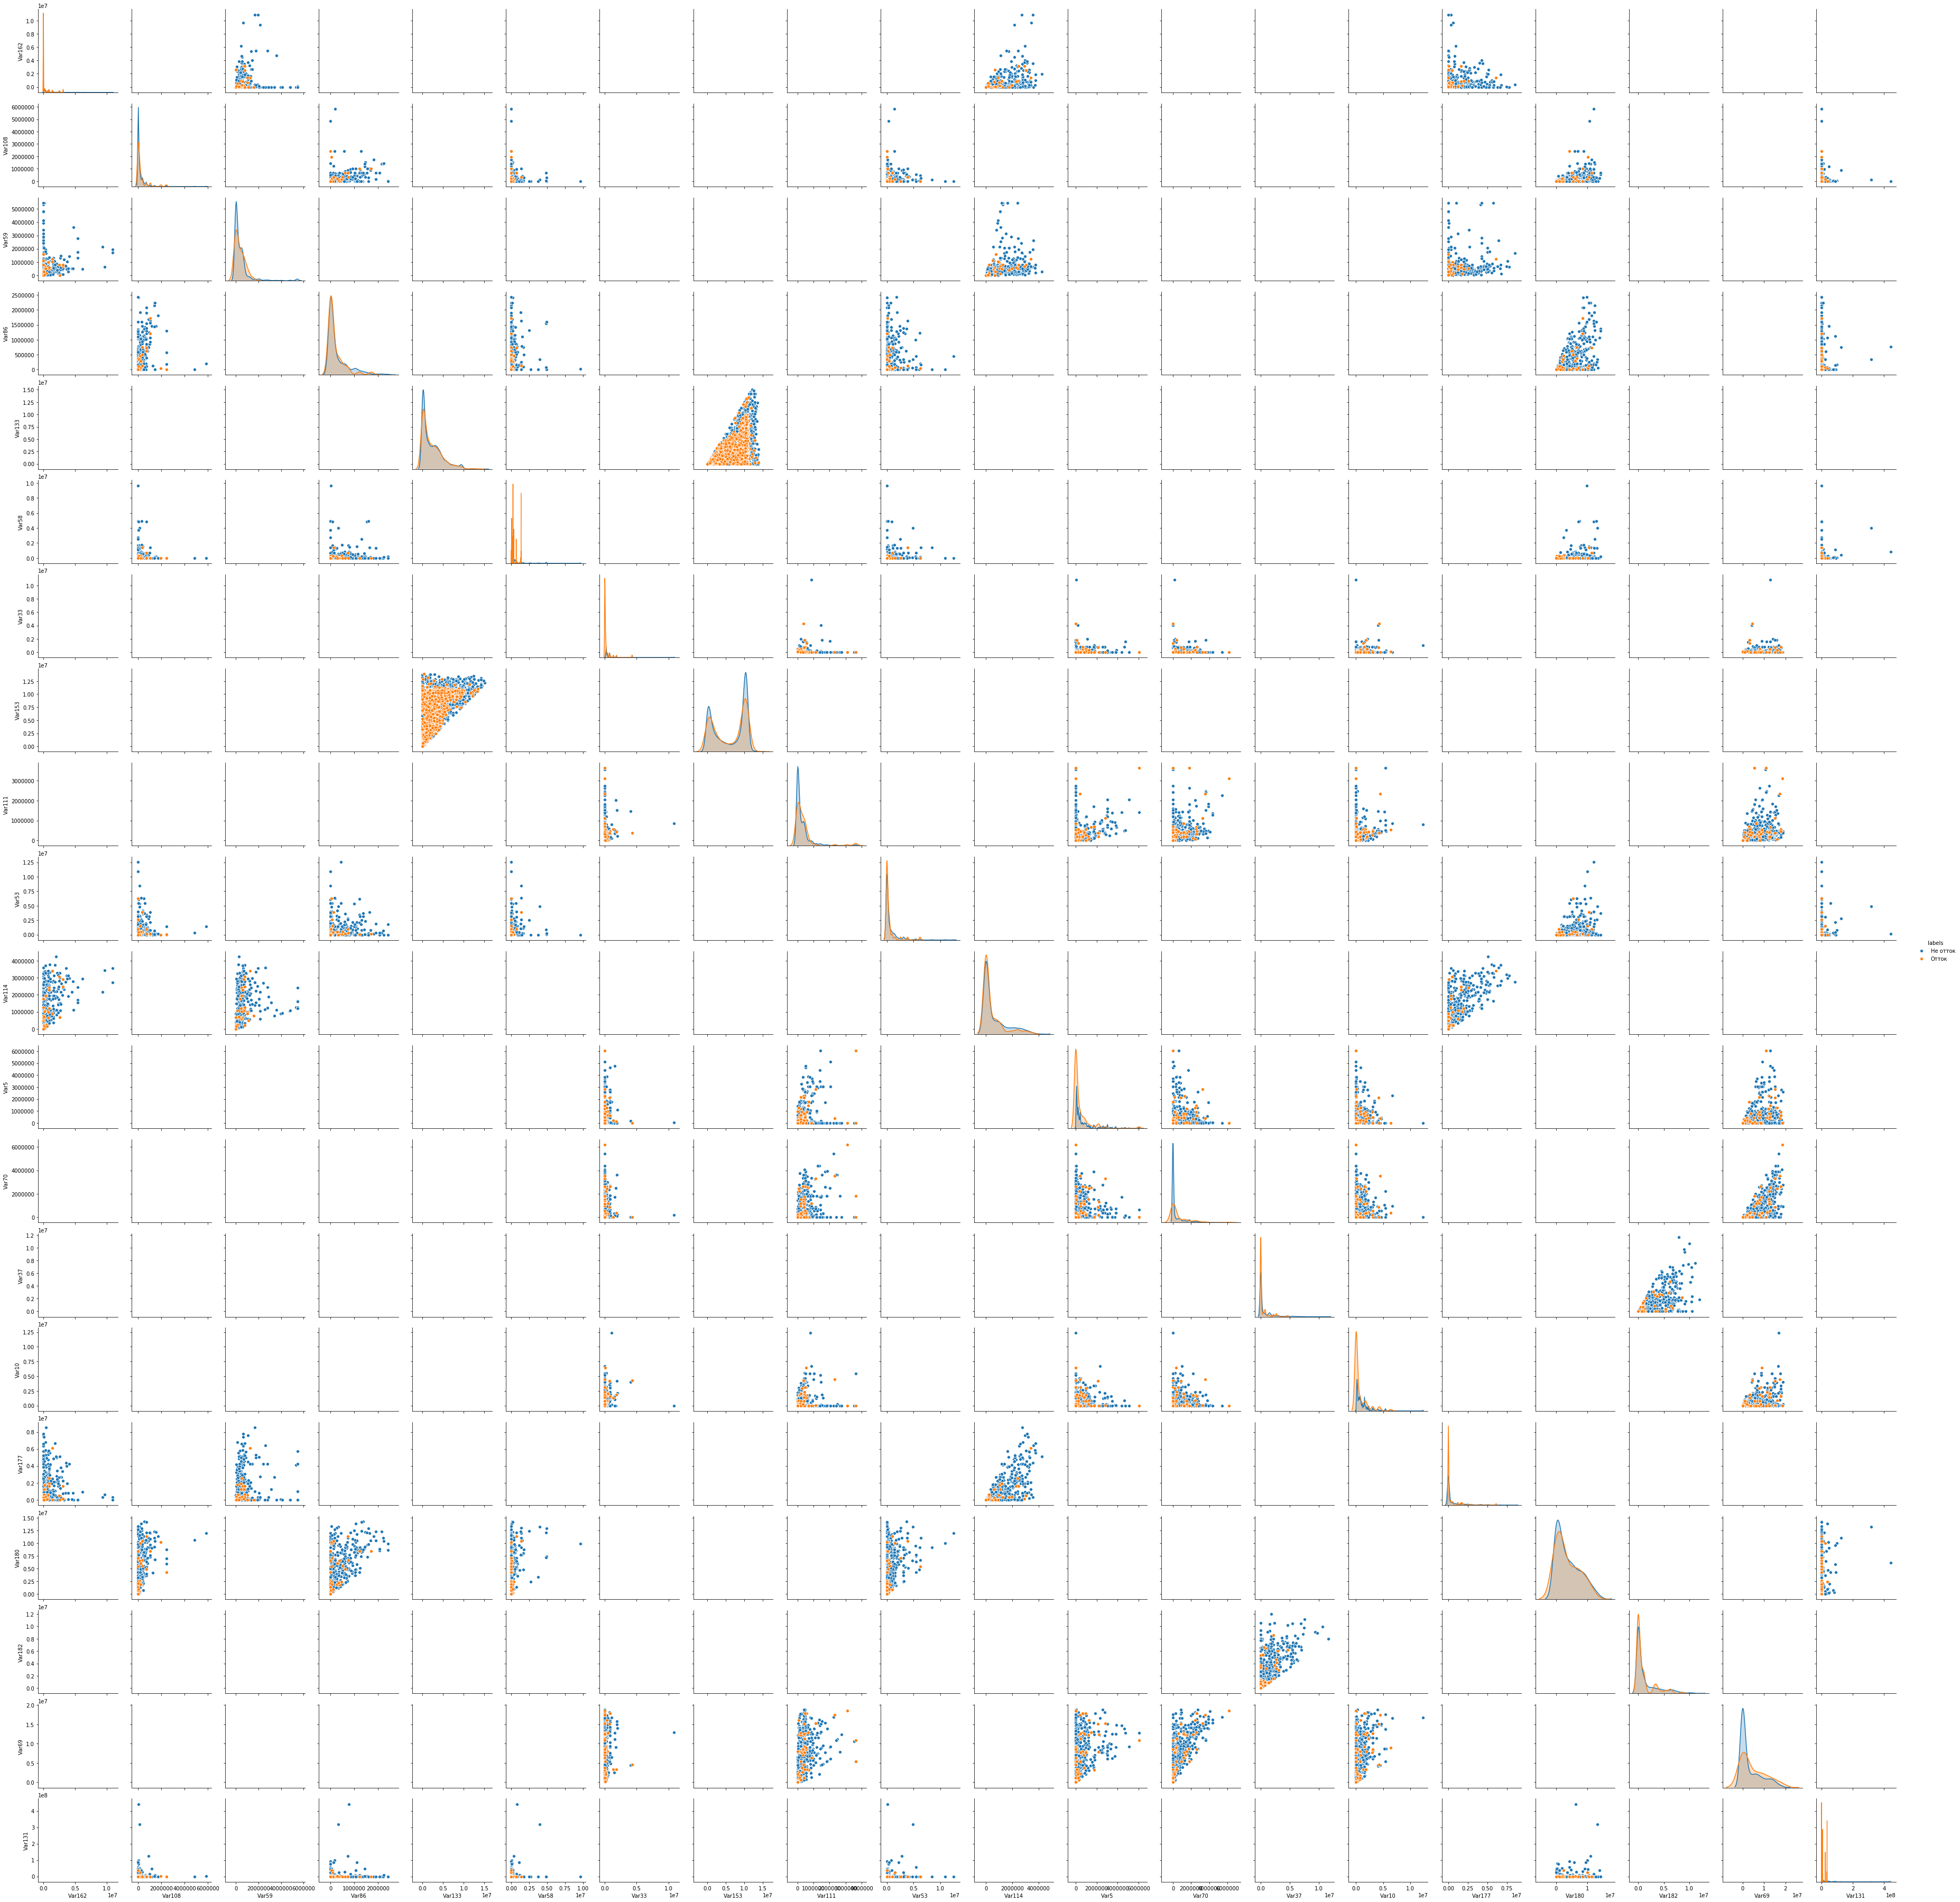

In [21]:
sns.pairplot(churn_data_labels[names_20+['labels']], hue='labels')

5\. Проделайте аналогичные шаги для случайно выбранных 10 числовых признаков.

In [38]:
random_10_names = ['Var'+str(i) for i in np.random.random_integers(1,190,10)]

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(1, 190 + 1) instead
  """Entry point for launching an IPython kernel.


Распределения десяти случайных числовых признаков в разрезе классов

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


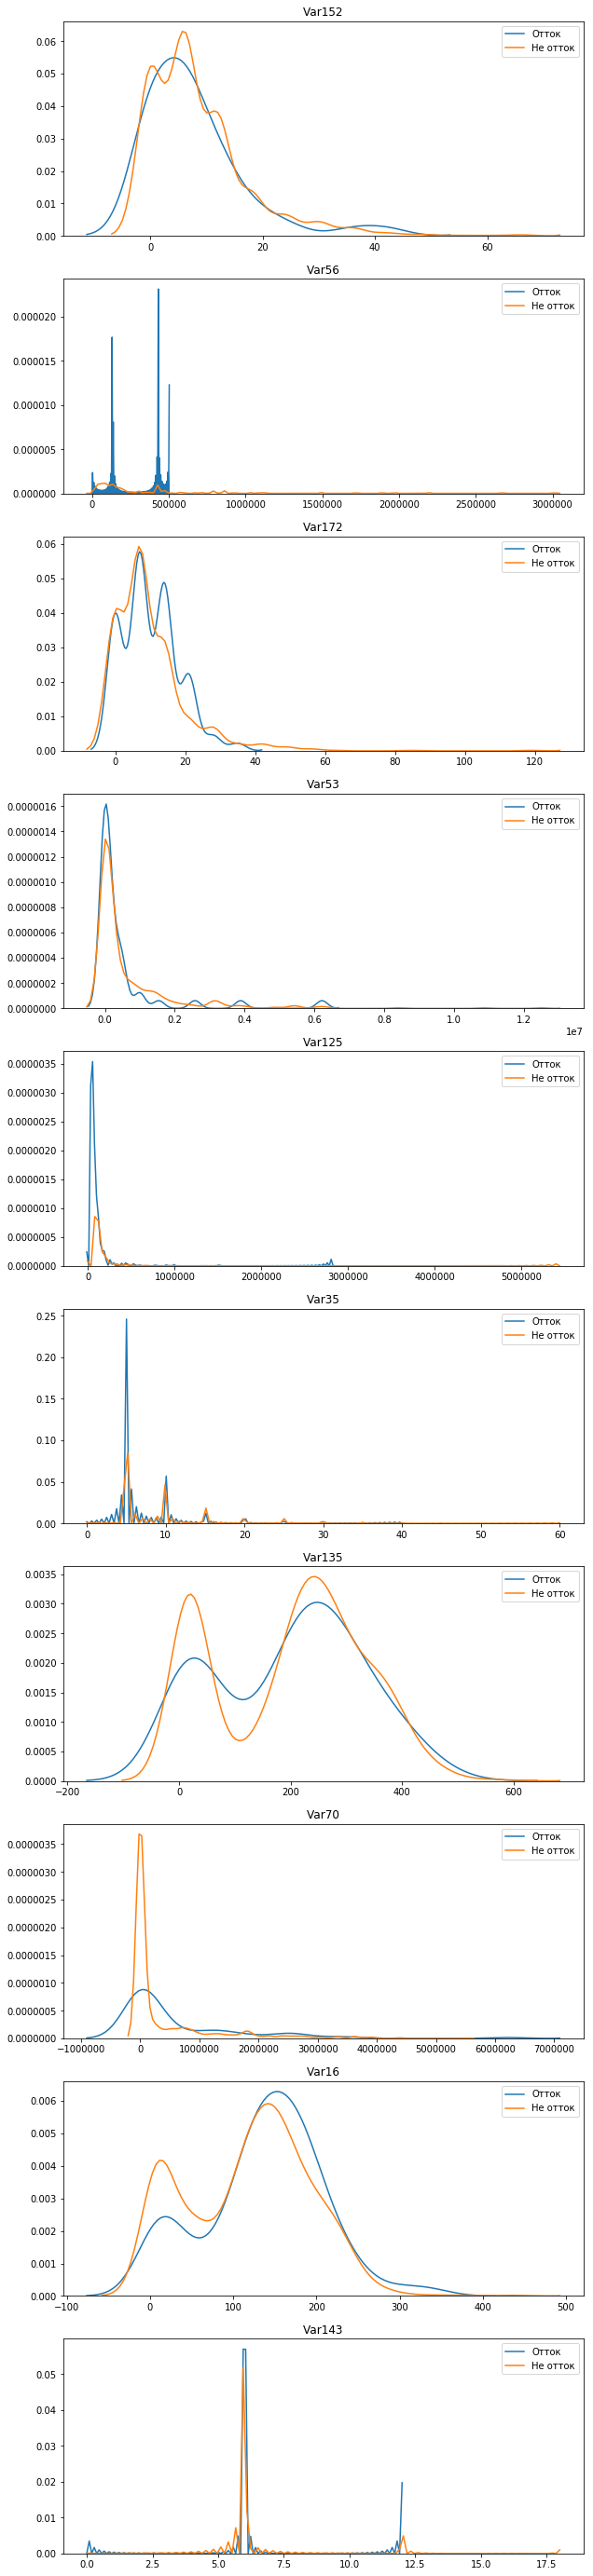

In [39]:
fig, ax = plt.subplots(nrows=10,ncols=1,figsize=(10,50))
for index, i in enumerate(random_10_names):
    a = sns.kdeplot(churn_data[(churn_labels == 1).values][i], ax = ax[index], label = 'Отток')
    a = sns.kdeplot(churn_data[(churn_labels == -1).values][i], ax = ax[index], label = 'Не отток')
    a.title.set_text(i)
    

Объекты в координатах пар десяти случайных числовых признаков.

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


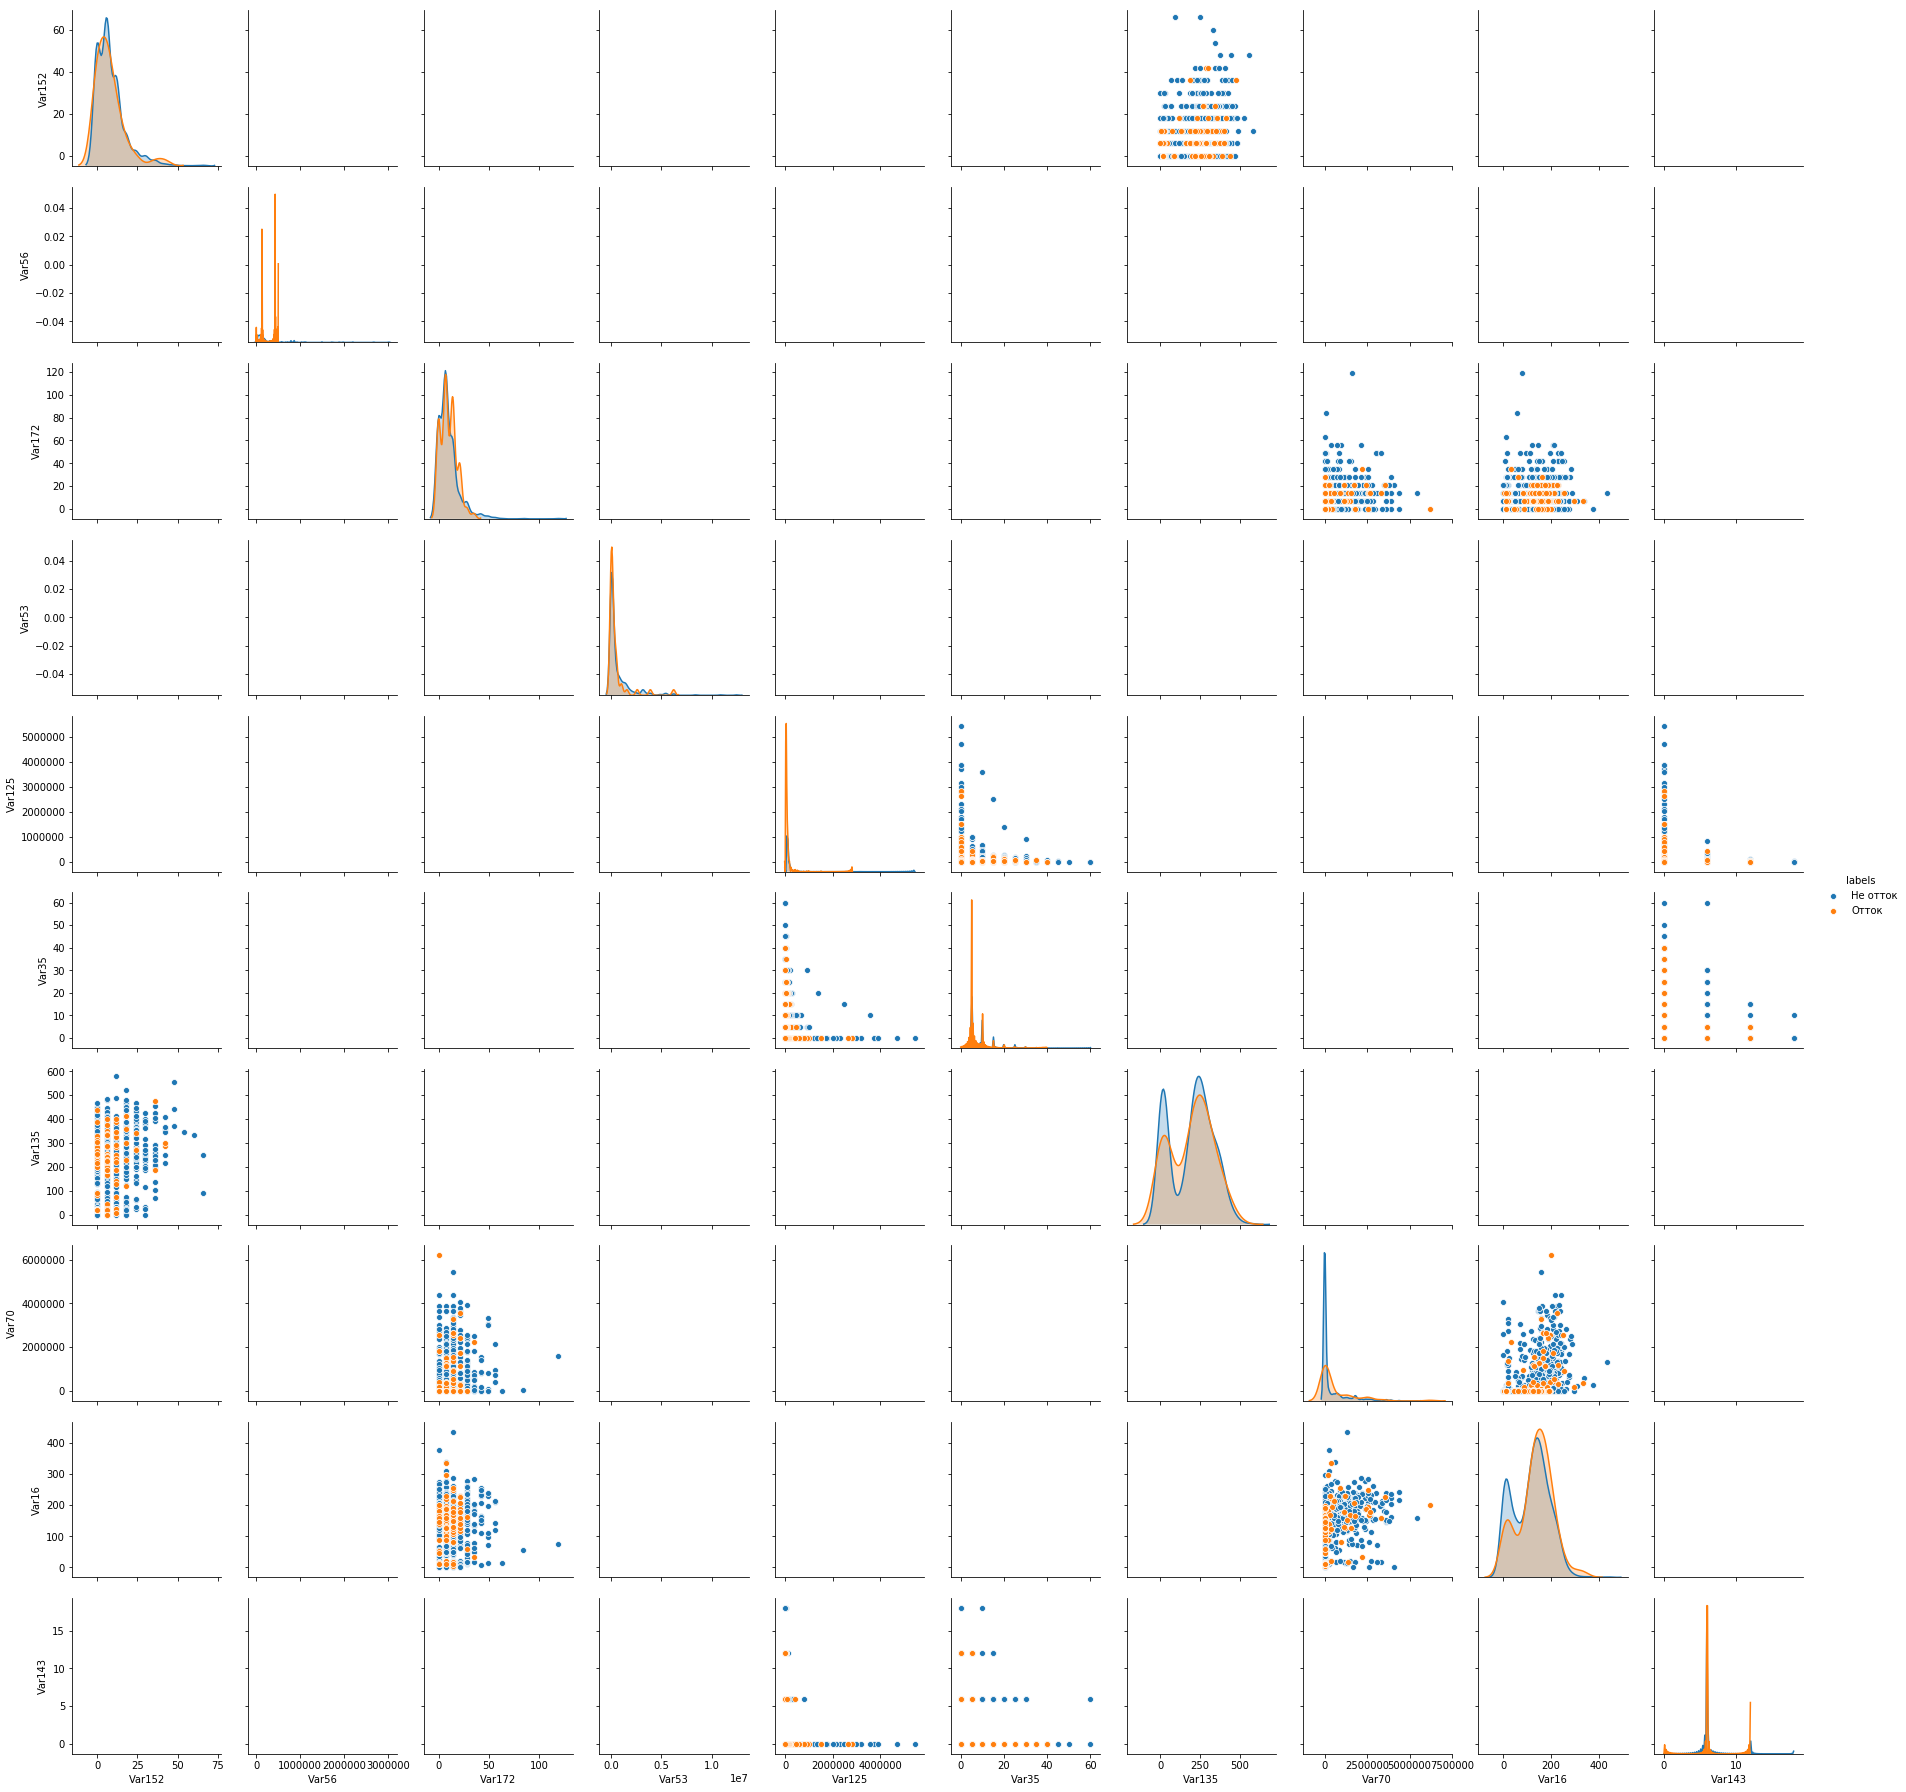

In [40]:
sns.pairplot(churn_data_labels[random_10_names+['labels']], hue='labels')

6\. Проделайте аналогичные шаги для 10 числовых признаков, наименее сильно коррелирующих с целевой переменной.

In [41]:
a = np.abs(rel)
a[a.argsort()]

array([0.00000000e+00, 5.01388455e-04, 5.53275854e-04, 8.77579041e-04,
       3.77985514e-03, 4.75508681e-03, 5.37634409e-03, 8.60772812e-03,
       1.18479046e-02, 1.89035917e-02, 2.06185567e-02, 2.30202578e-02,
       2.64650284e-02, 3.53648504e-02, 3.74354923e-02, 4.37377833e-02,
       4.50726889e-02, 5.16129032e-02, 5.38499196e-02, 5.66473180e-02,
       6.00178531e-02, 6.04083435e-02, 6.65552308e-02, 6.81946802e-02,
       9.03225806e-02, 9.46795472e-02, 1.00022520e-01, 1.11765530e-01,
       1.29099937e-01, 1.72389678e-01, 1.81434599e-01, 1.83008136e-01,
       2.26658675e-01, 2.55786857e-01, 2.76129032e-01, 2.84236171e-01,
       2.87924888e-01, 3.20996038e-01, 3.63010753e-01, 4.30390492e-01,
       4.37351443e-01, 4.91182796e-01, 5.19526027e-01, 5.86919994e-01,
       6.13582922e-01, 6.18377980e-01, 6.23097447e-01, 7.23049726e-01,
       7.40448717e-01, 8.25217862e-01, 9.09631698e-01, 9.31934276e-01,
       9.44419093e-01, 1.03213611e+00, 1.13701085e+00, 1.23362155e+00,
      

In [42]:
corr_10 = {}
names_10 = []

for index, value in zip(a.argsort()[:10], rel[a.argsort()][:10]):
    corr_10['Var'+str(index+1)] = value
    names_10.append('Var'+str(index+1))

Распределения десяти наименее коррелированных числовых признаков в разрезе классов

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


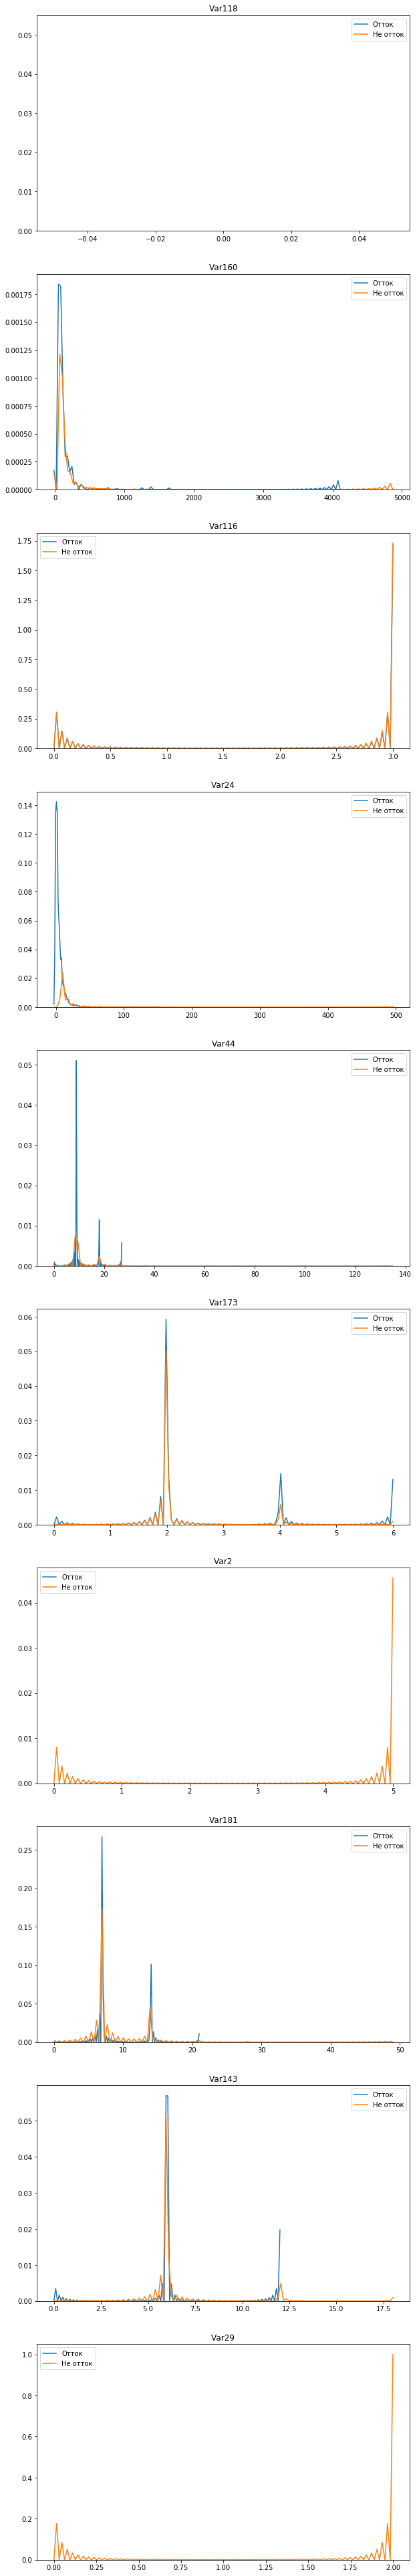

In [43]:
fig, ax = plt.subplots(nrows=10,ncols=1,figsize=(10,70))
for index, i in enumerate(corr_10.keys()):
    a = sns.kdeplot(churn_data[(churn_labels == 1).values][i], ax = ax[index], label = 'Отток')
    a = sns.kdeplot(churn_data[(churn_labels == -1).values][i], ax = ax[index], label = 'Не отток')
    a.title.set_text(i)

Объекты в координатах пар десяти наименее коррелированных числовых признаков.

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


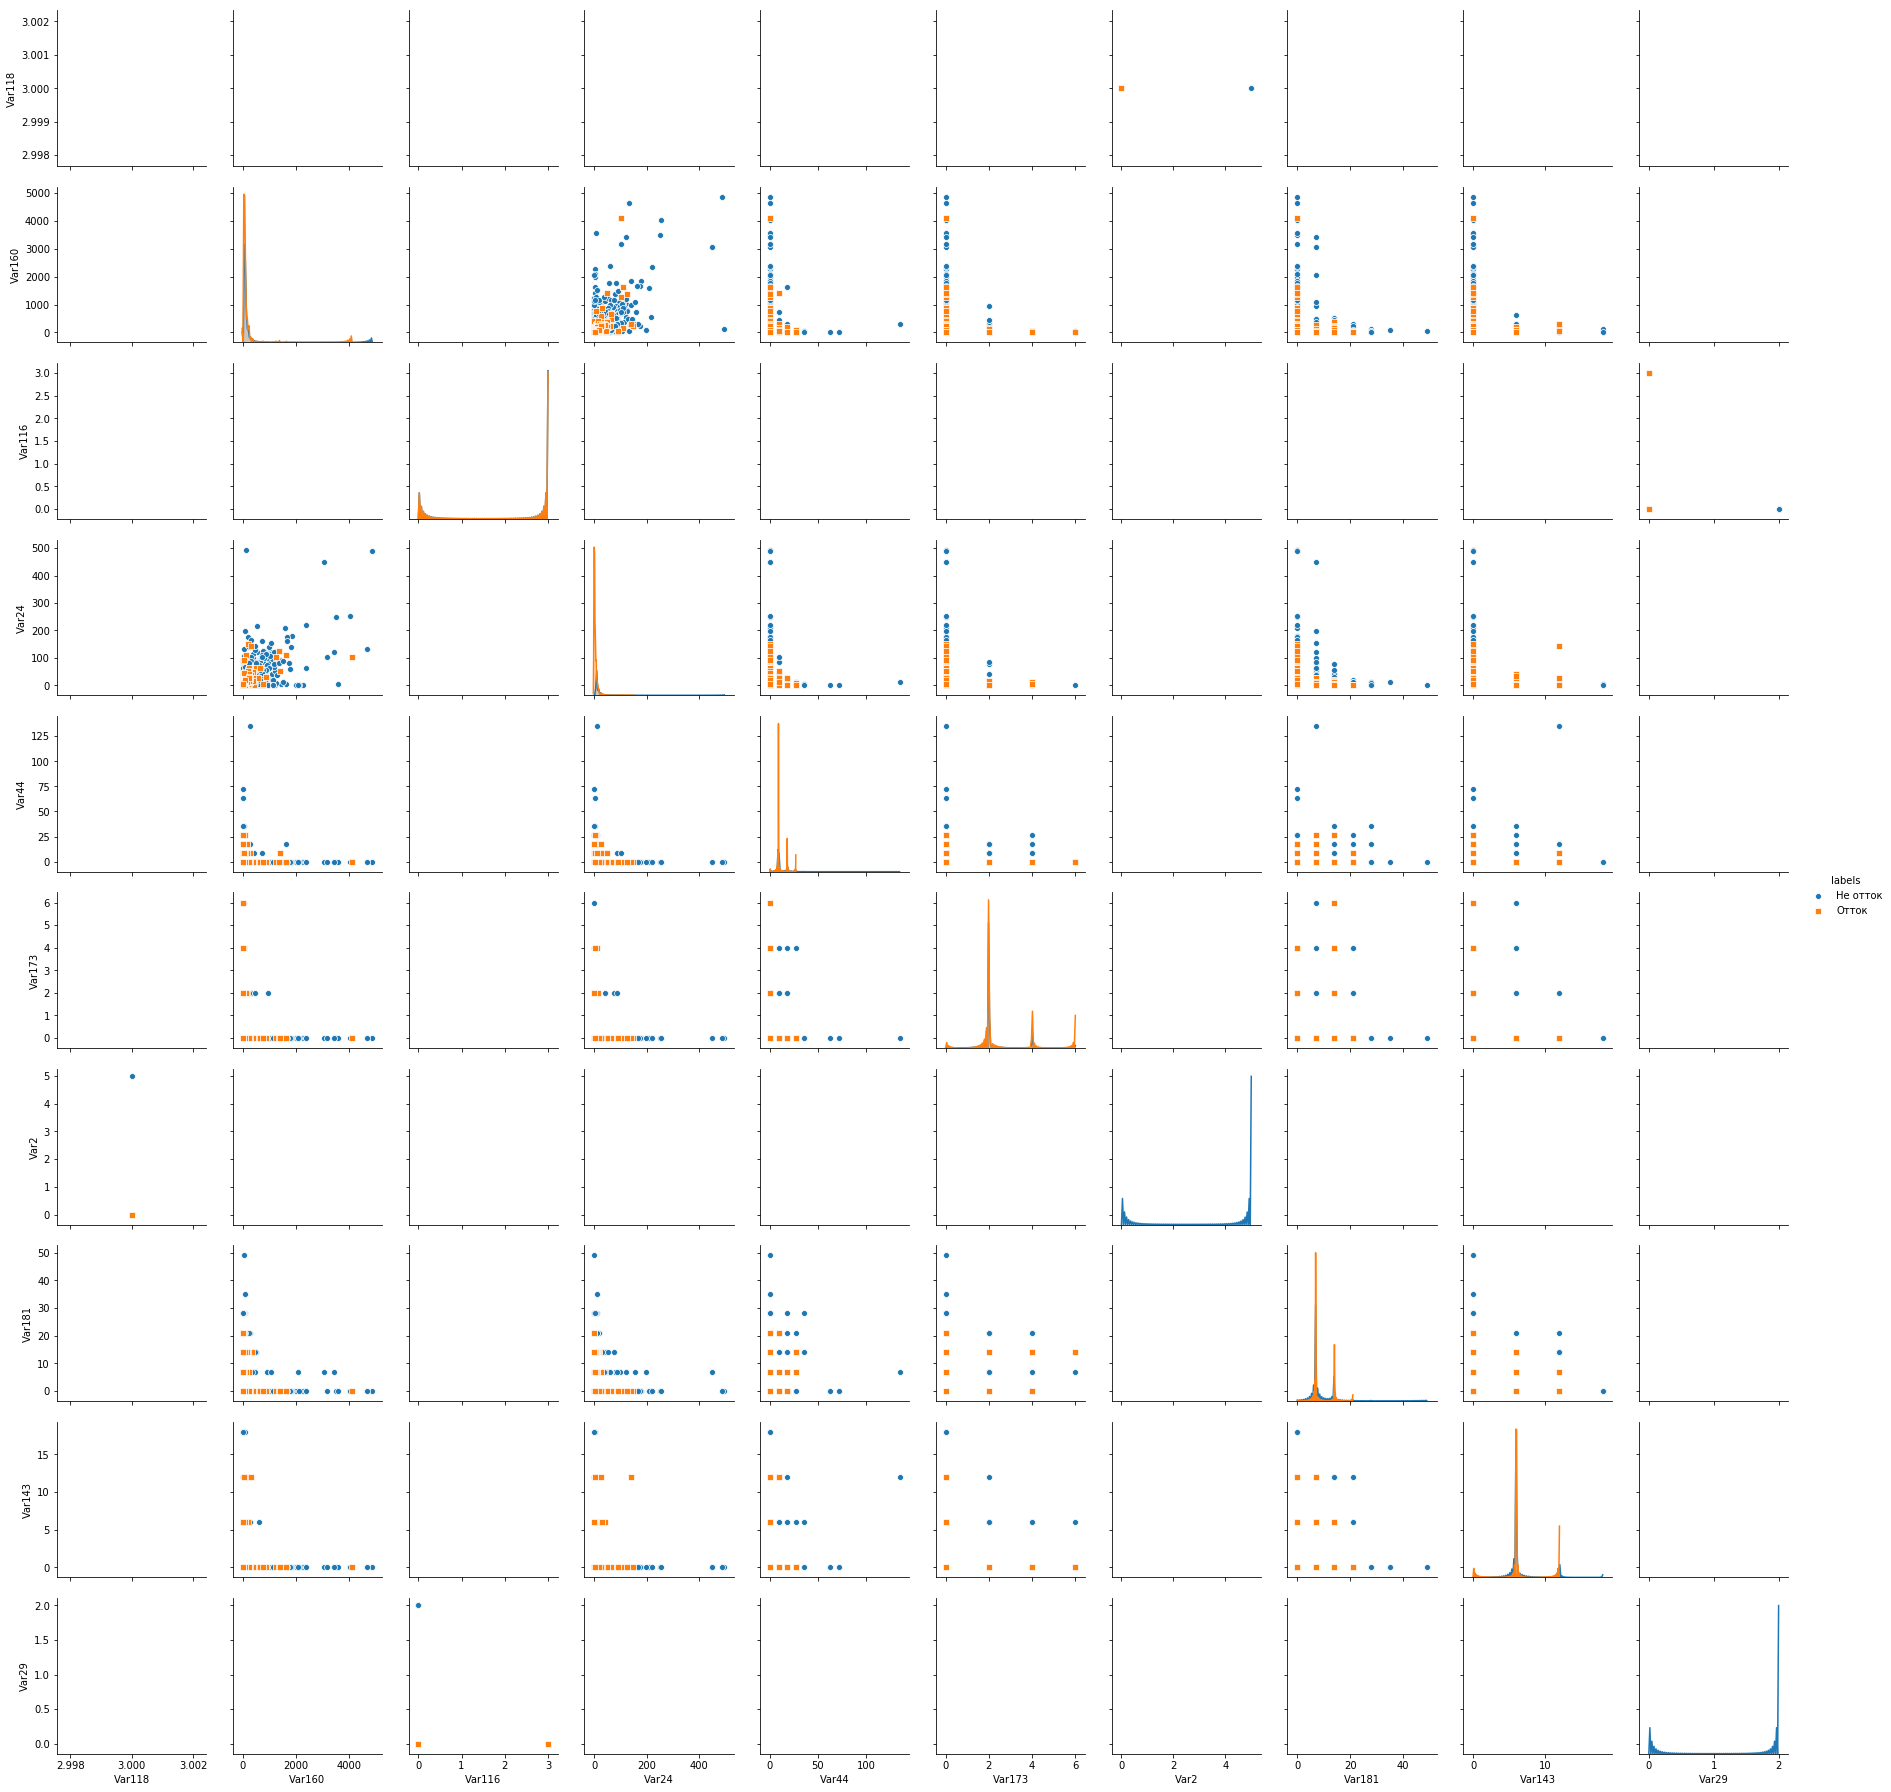

In [44]:
sns.pairplot(churn_data_labels[names_10+['labels']], hue='labels', markers=['o', 's'])

7\. Посмотрите на категориальные переменные: постройте и сравните гистограммы значений категориальных переменных для разных классов.

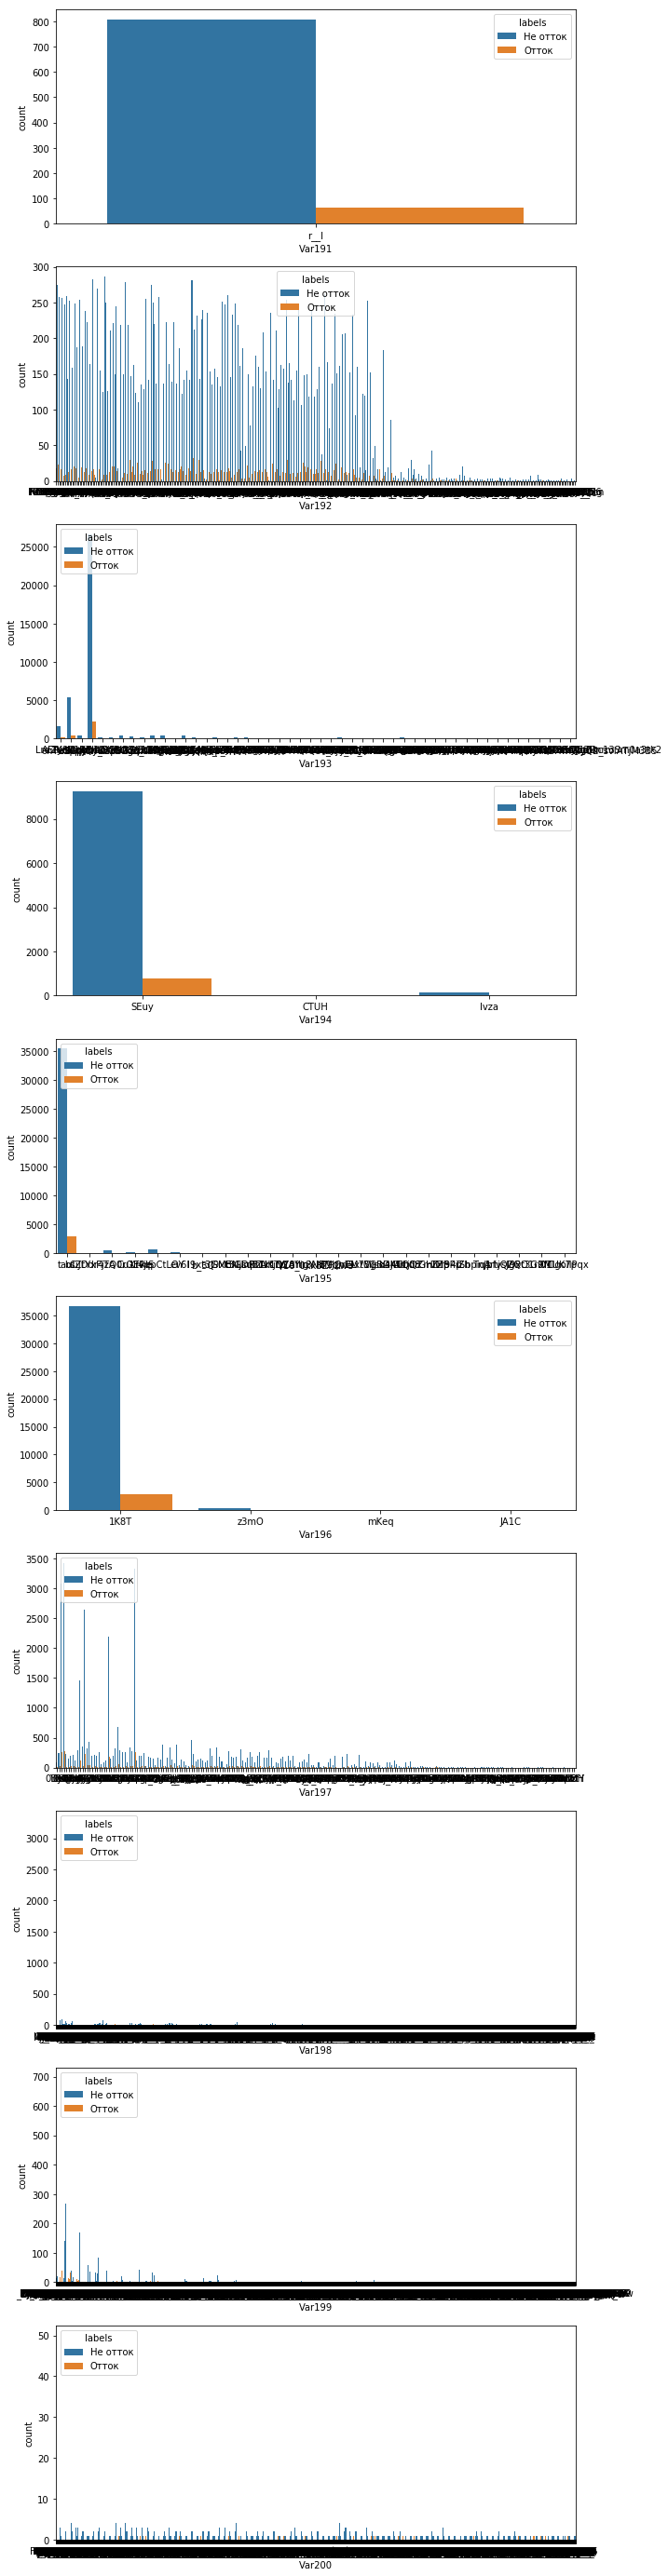

In [45]:
fig, ax = plt.subplots(nrows=10, figsize=(10,50))
for index, col in enumerate(churn_data.columns[190:200]):
    sns.countplot(x=col, data=churn_data, hue='labels', ax=ax[index])

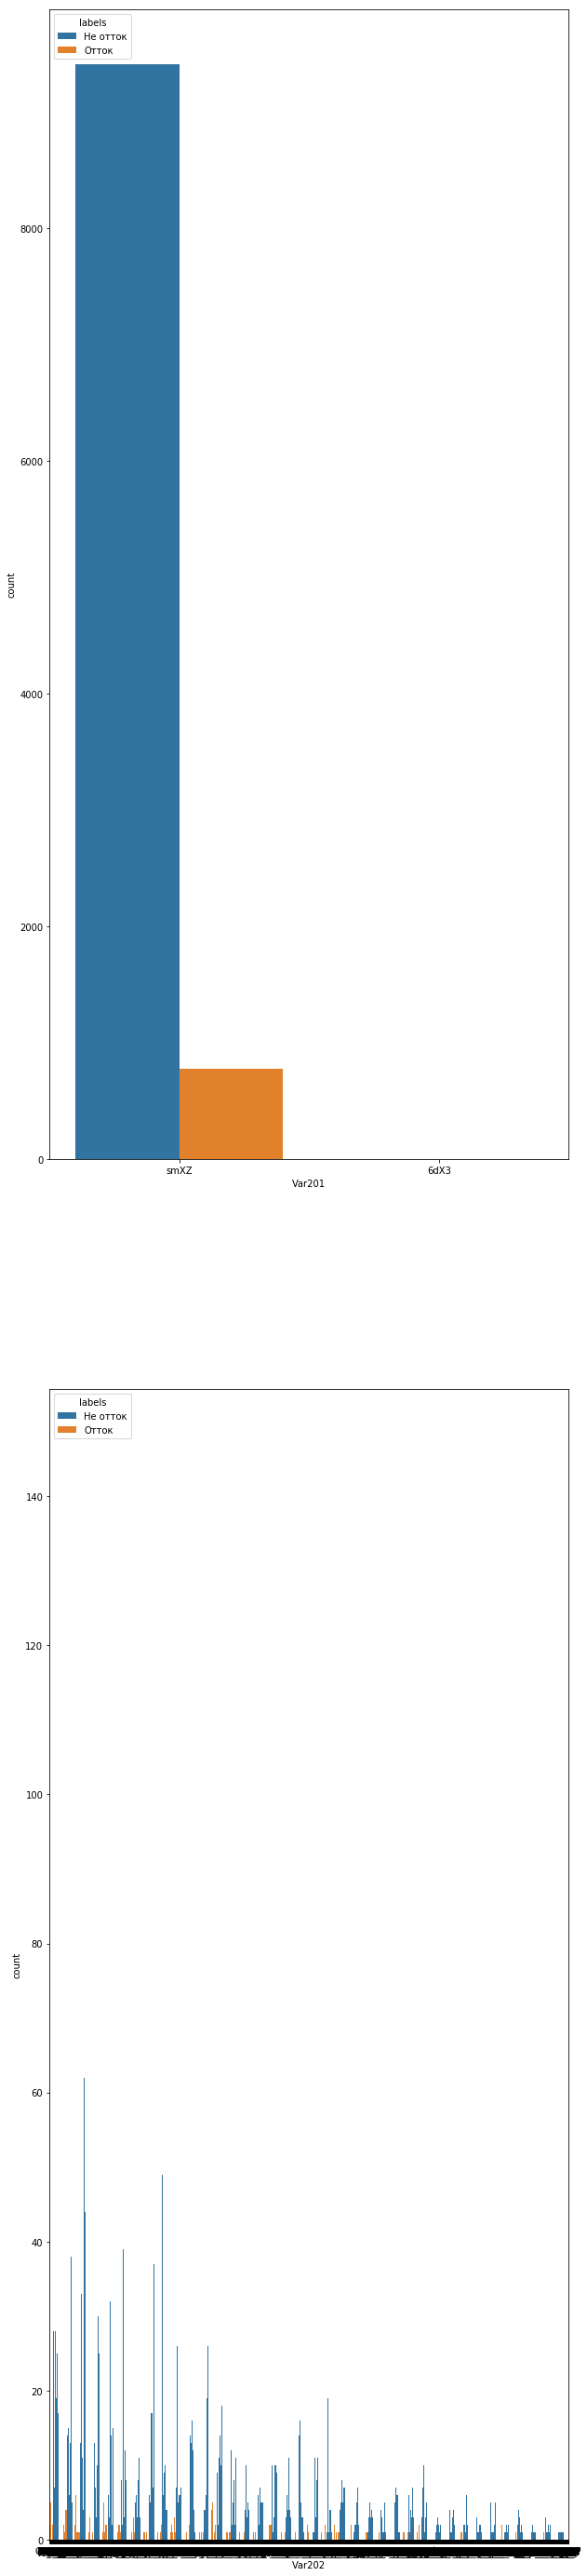

In [46]:
fig, ax = plt.subplots(nrows=2, figsize=(10,50))
for index, col in enumerate(churn_data.columns[200:202]):
    sns.countplot(x=col, data=churn_data, hue='labels', ax=ax[index])

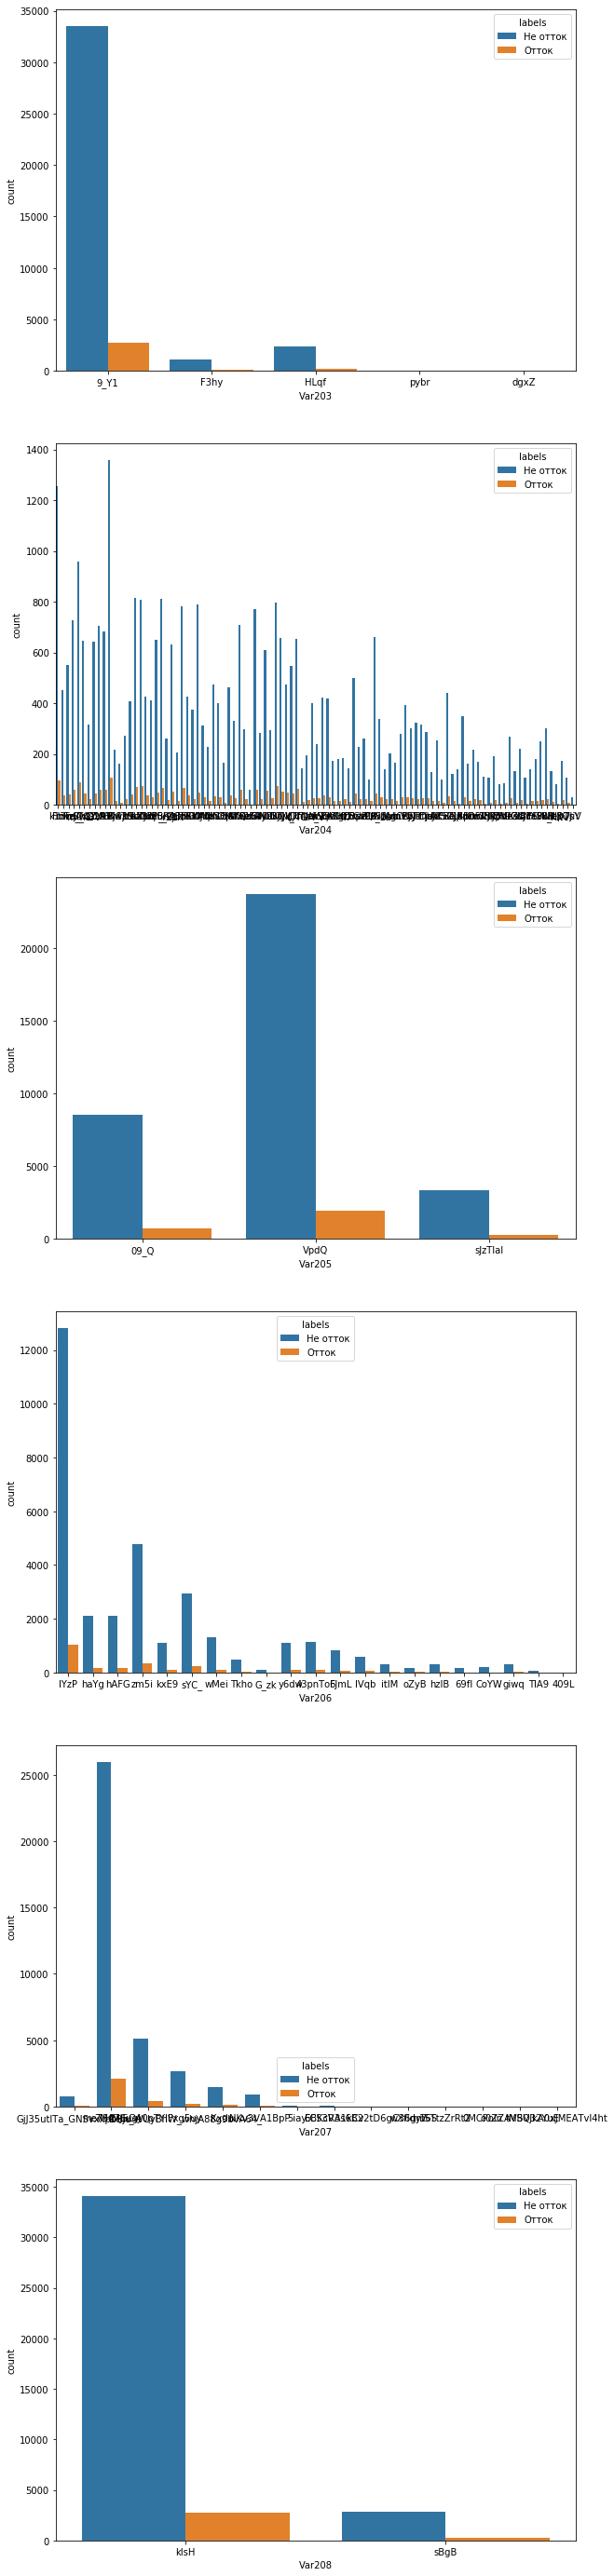

In [47]:
fig, ax = plt.subplots(nrows=6, figsize=(10,50))
for index, col in enumerate(churn_data.columns[202:208]):
    sns.countplot(x=col, data=churn_data, hue='labels', ax=ax[index])

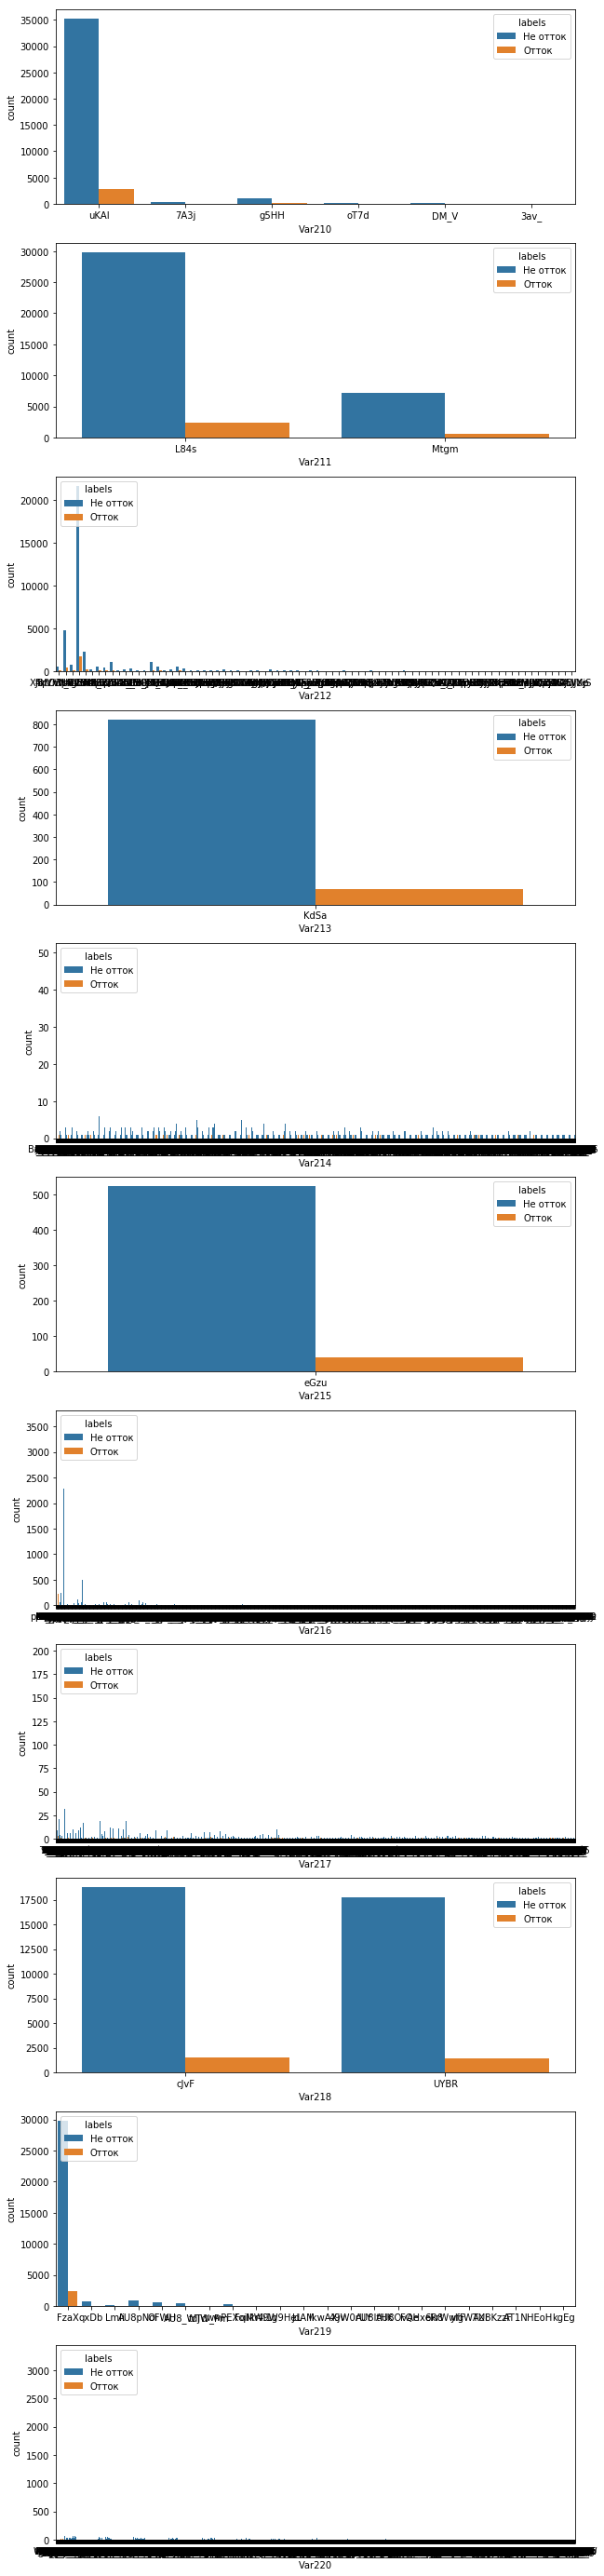

In [48]:
fig, ax = plt.subplots(nrows=11, figsize=(10,50))
for index, col in enumerate(churn_data.columns[209:220]):
    sns.countplot(x=col, data=churn_data, hue='labels', ax=ax[index])

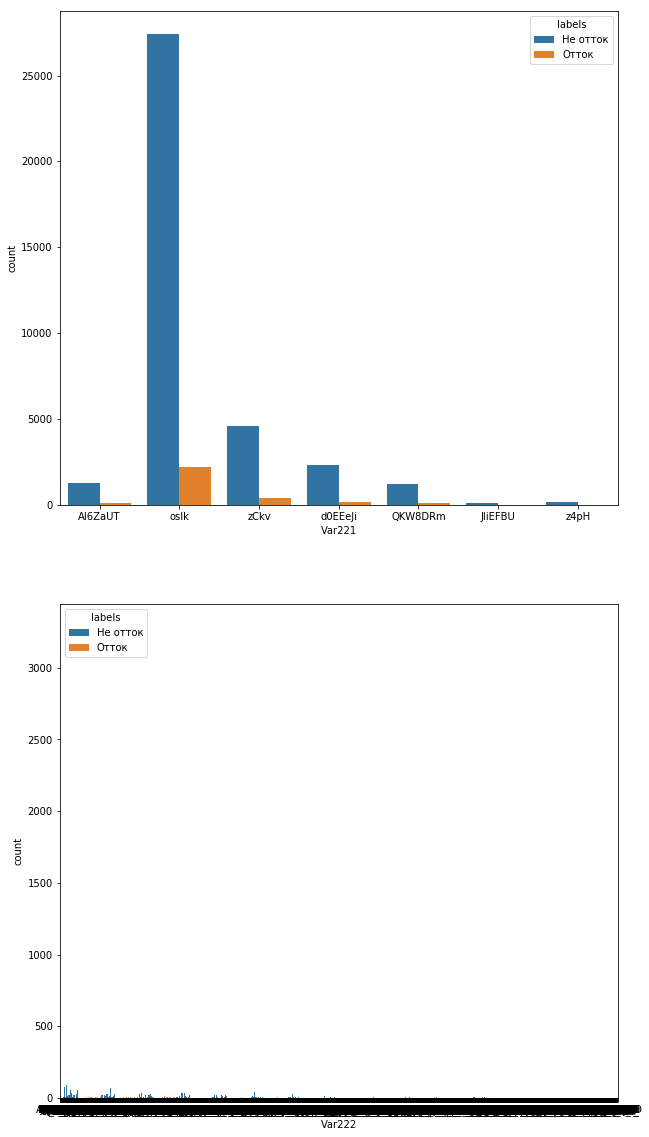

In [49]:
fig, ax = plt.subplots(nrows=2, figsize=(10,20))
for index, col in enumerate(churn_data.columns[220:222]):
    sns.countplot(x=col, data=churn_data, hue='labels', ax=ax[index])

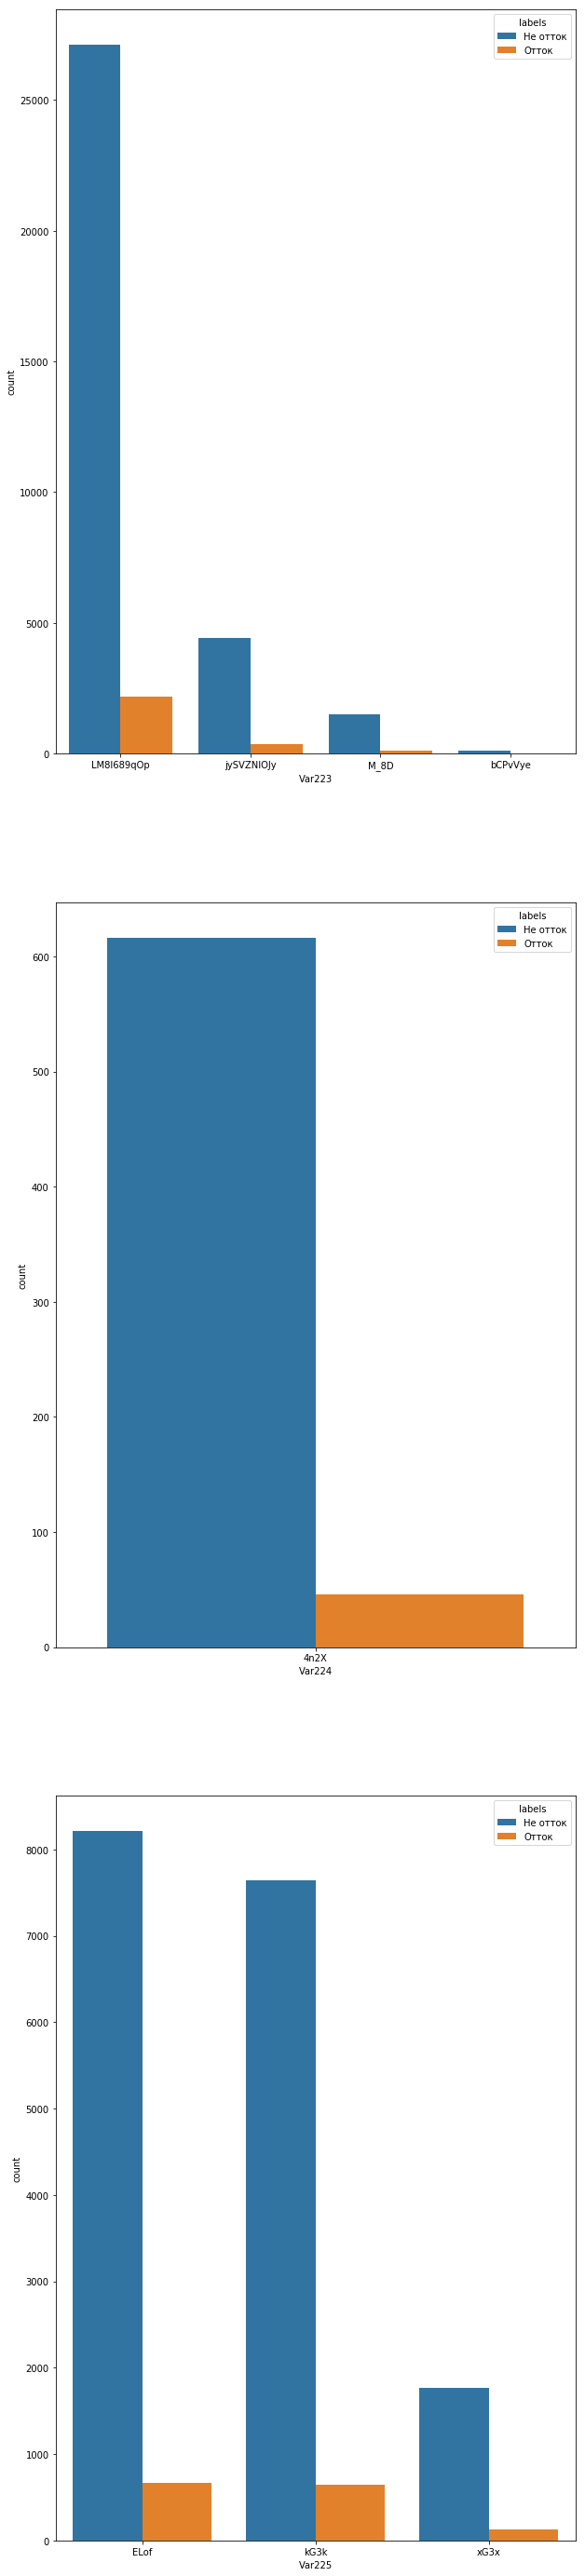

In [50]:
fig, ax = plt.subplots(nrows=3, figsize=(10,50))
for index, col in enumerate(churn_data.columns[222:225]):
    sns.countplot(x=col, data=churn_data, hue='labels', ax=ax[index])

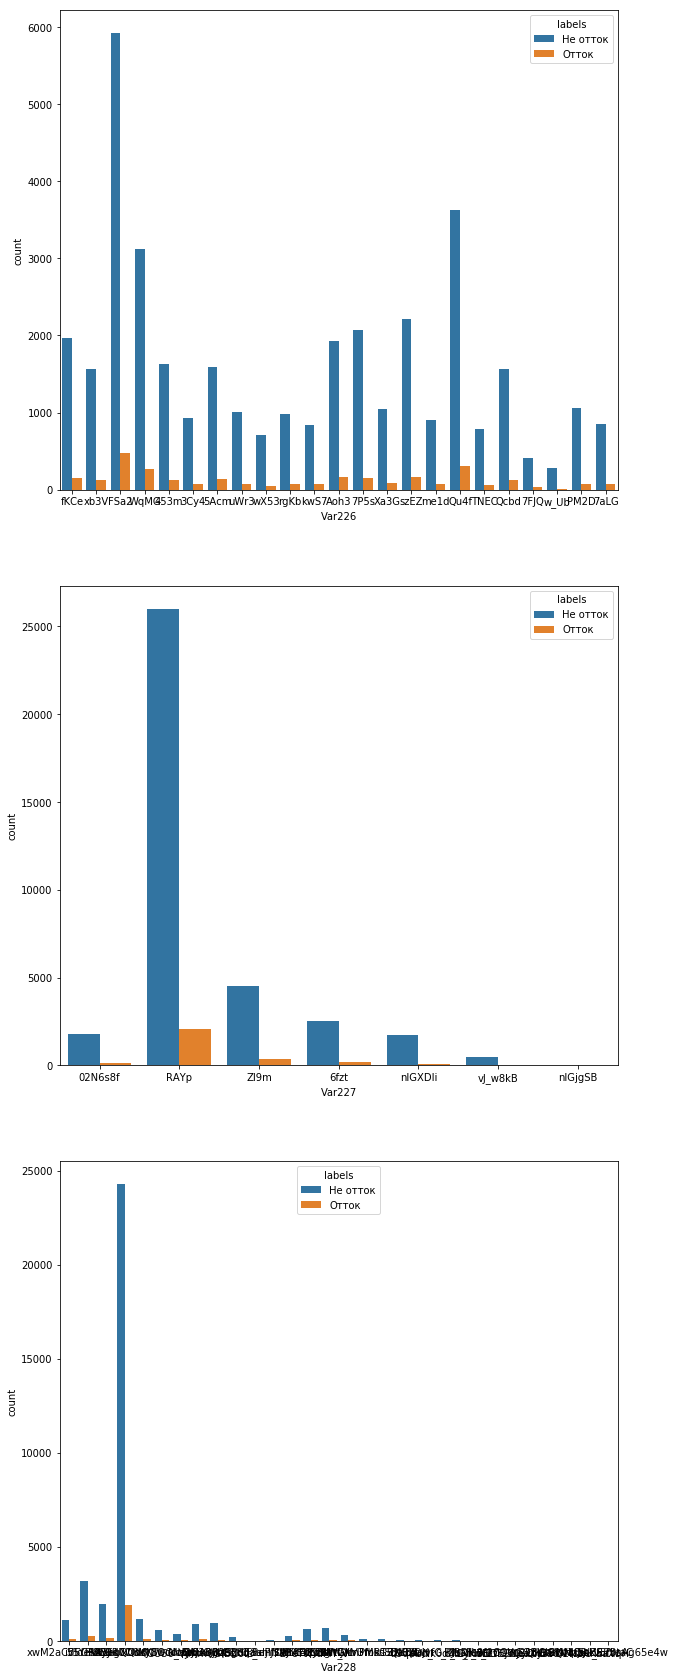

In [51]:
fig, ax = plt.subplots(nrows=3, figsize=(10,30))
for index, col in enumerate(churn_data.columns[225:228]):
    sns.countplot(x=col, data=churn_data, hue='labels', ax=ax[index])

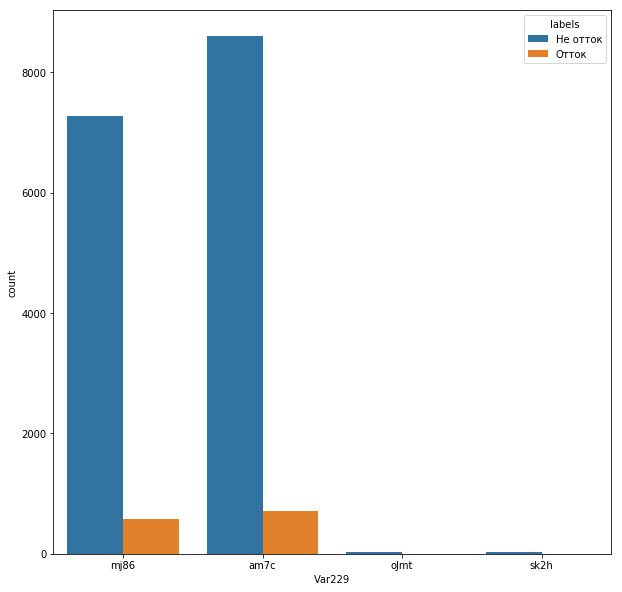

In [52]:
fig, ax = plt.subplots(nrows=1, figsize=(10,10))
for index, col in enumerate(churn_data.columns[228:-2]):
    sns.countplot(x=col, data=churn_data, hue='labels', ax=ax)

8\. Проанализируйте полученные результаты:
* Какие выводы вы можете сделать? Заметили ли вы какие-нибудь интересные закономерности?
* На основании полученных изображений и таблиц, предположите, какие переменные окажут наибольшее влияние (вклад) в модель?
* Какие переменные на ваш взгляд окажутся наименее полезными, шумовыми?
* Как вы думаете, окажется ли отбор признаков полезным для построения модели?

Для двадцати численных наиболее коррелированных признаков: 

1) Визуально видно различие распределений для значений "отток" и "не отток"; 

2) Отображение объектов в координатах пар этих двадцати признаков показывает, что на паре Var153-Var133 объекты расположились по одну сторону от прямой, проходящей через начало координат, на 45 градусов к оси абсцисс, при этом объекты класса "отток" занимают площадь меньше, чем "не отток", это также видно на визуализации распределений этих двух признаков. 

3) На парах признаков Var86-Var108, Var69-Var10/70/5/111/33, в парах признаков Var69, Var33 в сочетании с любым из 20-ти облака объектов различных классов смешиваются. 

4) На визуализациях объектов на другие пары среди этих 20 признаков видно, что объекты класса "отток" расположены преимущественно вдоль одной из осей координат либо ближе к началу координат.

Для десяти случайных численных признаков:
    
1) На паре признаков Var149-Var126 облако объектов "отток" достаточно сконцентрировано, расположено вдоль оси абсцисс - признак Var126, присутствуют выбросы.

2) На остальных парах признаков объекты достаточно смешаны.

Для 10 числовых признаков, наименее сильно коррелирующих с целевой переменной:

1) Для признаков Var118, Var116, Var2, Var29 недостаточно данных для восстановления распределения. На признаках Var173, Var181, Var143 видна небольшая разница в распределениях на классах "отток" и "не отток". На признаках Var24, Var44, Var160 видна разница в распределениях.

2) Признаки Var181, Var143, Var173, Var44 дискретны, визуализация их пар показывает, что объекты разных типов на них различимы. Эти признаки, возможно, могут быть полезны. На визуализации объектов на пару Var24-Var160 объекты класса "отток" сконцентрированы ближе к началу координат, присутствуют выбросы.

Категориальные переменные Var194/195/196/201/203/229 могут быть полезны, поскольку объекты класса "отток" принимают либо одно значение на каждом признаке, либо не более трёх.

Думаю, что наибольший влияние на модель окажут признаки: Var5, Var37, Var44, Var53, Var58, Var59, Var86, Var111, var114, Var126, Var131, Var143, Var149, Var153, Var173, Var177, Var181, Var194, Var195, Var196, Var201, Var203, Var229.

Среди числовых признаков достаточно много с более чем 95% пропусков. Присутствуют признаки со 100% пропусков.

Думаю, отбор признаков окажется полезным для построения модели. Возможно, не лишним будет сконструировать новые признаки.